In [4]:
library(ggplot2)
library(mgcv)

# C3M4 Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Observe the difference between GAMs and other regression models on simulated data.
2. Review how to plot and interpret the coefficient linearity for GAM models.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [5]:
# Load packages
library(ggplot2)
library(mgcv)

# Problem 1: GAMs with Simulated Data

In this example, we show how to check the validity of a generalized additive model (GAM) (using the `gam()` function) using simulated data. This allows us to try and understand the intricacies of `gam()` without having to worry about the context of the data. 

### 1. (a) Simulate the Data

Let $n = 200$. First, construct three predictor variables. The goal here is to construct a GAM with different types of predictor terms (e.g., factors, continuous variables, some that will enter linearly/parametrically, some that enter transformed).

1. x1: A continuous predictor that, we will suppose has a nonlinear relationship with the response.
2. x2: A categorical variable with three levels: `s`, `m`, and `t`.
3. x3: A categorical variable with two levels: `TRUE` and `FALSE`.

Then, make the response some nonlinear/nonparametric function of $\mathbf{x}$. For our case, use: $$\log(\mu_i) = \beta_1 + \sin(0.5x_{i,1}^2) - x_{i,2} + x_{i,3}$$ This model is a Poisson GAM. In a realworld situation, we wouldn't know this functional relationship and would estimate it. Other terms are modeled parametrically. The response has normal noise.

Note that:

1. The construction of $\boldsymbol\mu = (\mu_1,...,\mu_n)^T$ has the linear predictor exponentiated, because of the nature of the link function. 
2. We use $\boldsymbol\mu$ to construct $\mathbf{y}  = (y_1,...,y_n)^T $. The assumption for Poisson regression is that the random variable $Y_i$ that generates $y_i$ is Poisson with mean $\mu_i$. 
3. `as.integer(as.factor(VARIABLE))` converts the labels of VARIABLE to 1, 2, 3,.. so that we can construct the relationship for these factors.

Plot the relationship of $\mathbf{y}$ to each of the predictors. **Then, split the data into a training (`train_sim`) and test (`test_sim`) set**.

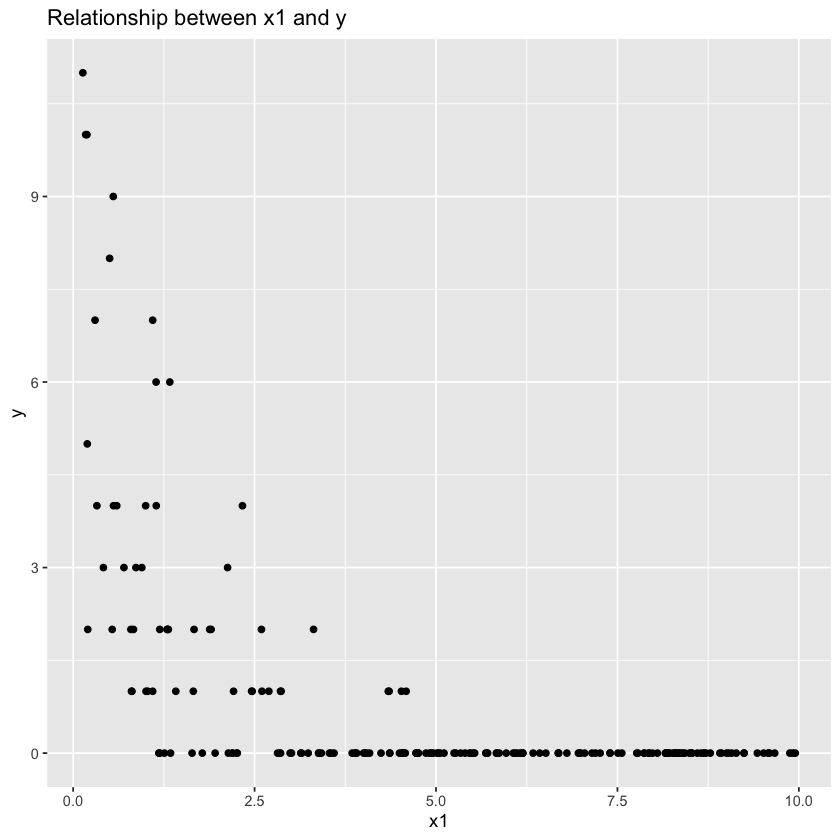

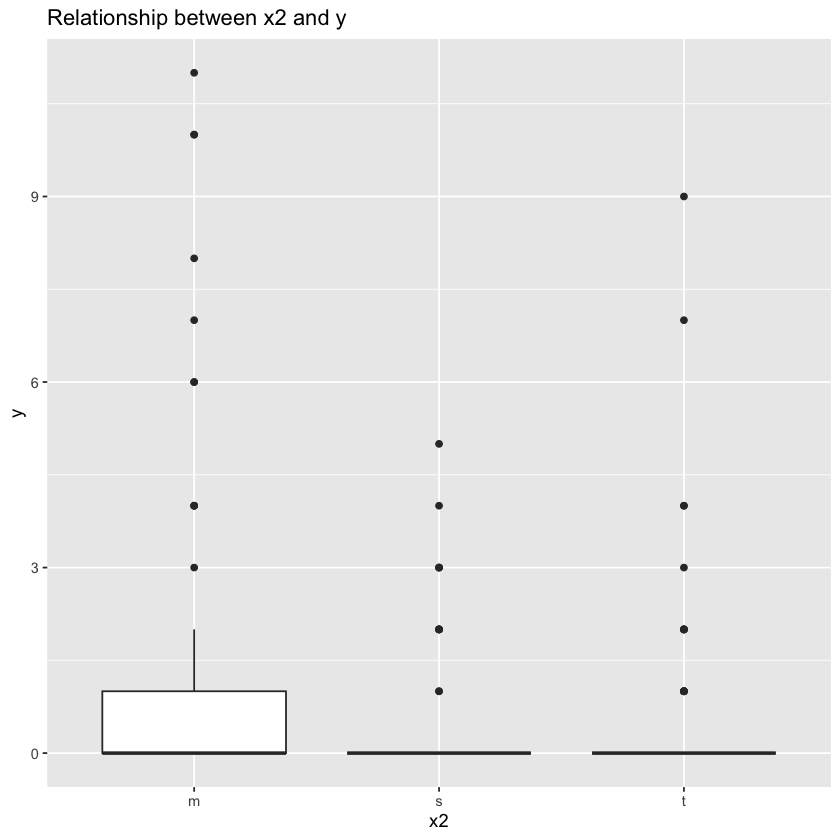

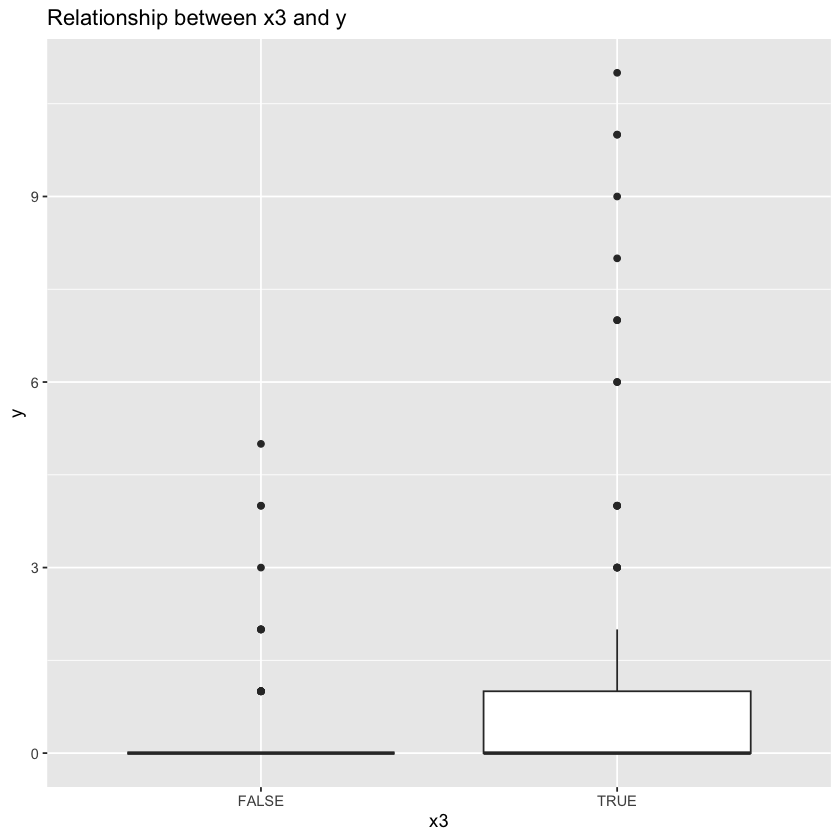

In [7]:
# Set random seed for reproducibility
set.seed(999)

# Simulate the data
n <- 200

x1 <- runif(n, 0, 10)  # Continuous predictor
x2 <- sample(c("s", "m", "t"), n, replace = TRUE)  # Categorical predictor with three levels
x3 <- sample(c(TRUE, FALSE), n, replace = TRUE)  # Categorical predictor with two levels

# Construct the response
mu <- exp(0.5 + sin(0.5 * ifelse(x2 == "s", 1, ifelse(x2 == "m", 2, 3))) - x1 + x3)
y <- rpois(n, mu)  # Simulated Poisson response with normal noise

# Create a data frame
sim_data <- data.frame(x1 = x1, x2 = x2, x3 = x3, y = y)

# Plot the relationships
ggplot(sim_data, aes(x = x1, y = y)) + geom_point() + ggtitle("Relationship between x1 and y")
ggplot(sim_data, aes(x = x2, y = y)) + geom_boxplot() + ggtitle("Relationship between x2 and y")
ggplot(sim_data, aes(x = x3, y = y)) + geom_boxplot() + ggtitle("Relationship between x3 and y")

# Split the data into training and test sets
set.seed(456)
train_indices <- sample(n, n * 0.7)  # 70% for training
train_sim <- sim_data[train_indices, ]
test_sim <- sim_data[-train_indices, ]


### 1. (b) Other Regression Models

Before jumping straight into GAMs, let's test if other regression models work. What about a regular linear regression model with ordinary least squares, and a generalized linear model for Poisson regression?

First fit a linear regression model to your `train_sim` data. We know that all of the predictors were used to make the response, but are they all significant in the linear regression model? Explain why this may be.

Then fit a Generalize Linear Model (GLM) to the `train_sim` data. Plot three diagnostic plots for your GLM:

1. Residual vs. log(Fitted Values)
2. QQPlot of the Residuals
3. Actual Values vs. Fitted Values

Using these plots, determine whether this model is a good fit for the data. Make sure to explain your conclusions and reasoning.


Call:
lm(formula = y ~ x1 + x2 + x3, data = train_sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7601 -0.8985 -0.1925  0.5541  7.7921 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.75699    0.34663   7.954 6.48e-13 ***
x1          -0.37061    0.04573  -8.104 2.82e-13 ***
x2s         -0.52716    0.32970  -1.599   0.1122    
x2t         -0.78109    0.30560  -2.556   0.0117 *  
x3TRUE       0.50046    0.26984   1.855   0.0658 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.524 on 135 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3544 
F-statistic: 20.07 on 4 and 135 DF,  p-value: 5.444e-13


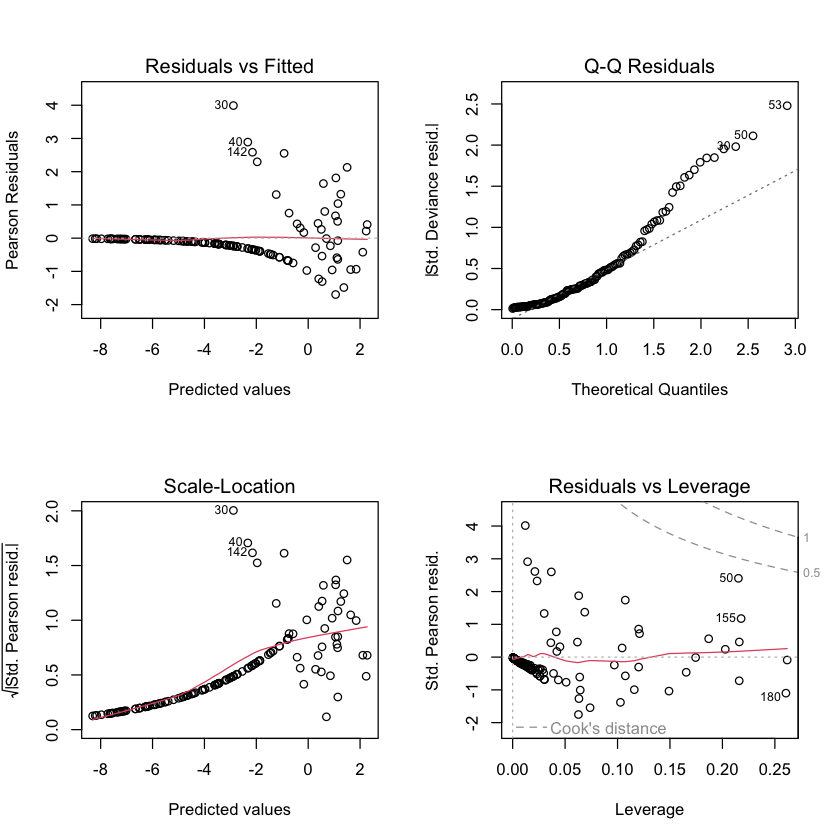

In [8]:
# # Simulate the predictor variables
# x1 <- runif(n, 0, 1)
# x2 <- sample(c("s", "m", "t"), n, replace = TRUE)
# x3 <- sample(c(TRUE, FALSE), n, replace = TRUE)

# # Simulate the response variable
# mu <- exp(1 + sin(0.5 * ifelse(x2 == "s", 1, ifelse(x2 == "m", 2, 3))) - x1 + as.integer(as.logical(x3)))
# y <- rpois(n, mu)

# # Create the simulated data frame
# simulated_data <- data.frame(x1, x2, x3, y)

# # Split the data into training and test sets
# train_indices <- sample(1:n, size = n * 0.7, replace = FALSE)
# train_sim <- simulated_data[train_indices, ]
# test_sim <- simulated_data[-train_indices, ]

# print(train_sim)

# # Fit a LM model to the data
# lm_model <- lm(y ~ x1 + x2 + x3, data = train_sim)


# # Fit a GLM model to the data
# glm_model <- glm(y ~ x1 + x2 + x3, family = poisson(link = "log"), data = train_sim)

# #residual plot
# plot(fitted(glm_model), residuals(glm_model), xlab = "Fitted Values", ylab = "Residuals", main = "Residuals vs. Fitted Values")


# # Create the three specified plots



# ## qqplot
# qqnorm(residuals(glm_model))
# qqline(residuals(glm_model))

# #fitted vs actual
# plot(fitted(glm_model), train_sim$y, xlab = "Fitted Values", ylab = "Actual Values", main = "Actual Values vs. Fitted Values")


# Fit a linear regression model
linear_model <- lm(y ~ x1 + x2 + x3, data = train_sim)

# Summary of linear regression model
summary(linear_model)

# Fit a Poisson GLM
glm_model <- glm(y ~ x1 + x2 + x3, data = train_sim, family = "poisson")

# Diagnostic plots for the GLM
par(mfrow = c(2, 2))
plot(glm_model)


for the lin

### 1. (c) Looking for those GAMs

Now, it's time to see how a generalized additive model (GAM) performs! Fit a GAM to the data. Construct the same three plots for your GAM model. Do these plots look better than those of the GLM?

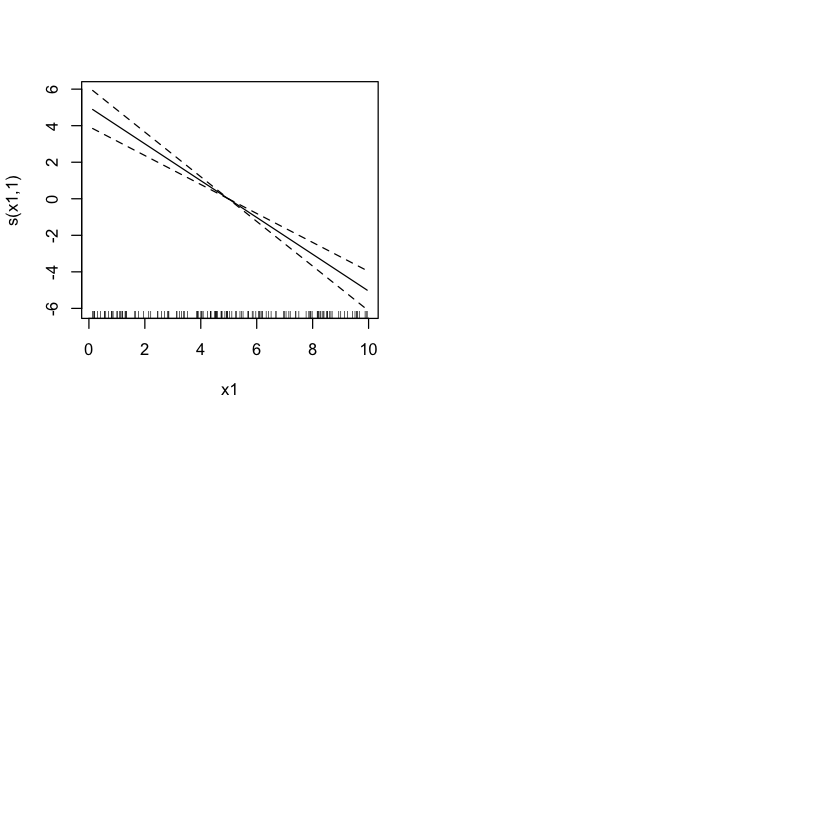

In [9]:
# # Fit a GAM model to the data
# gam_model <- gam(y ~ s(x1) + x2 + x3, data = train_sim, family = poisson(link = "log"))


# # Construct the three specified plots



# #residual vs fitted 
# plot(fitted(gam_model), residuals(gam_model), xlab = "Fitted Values", ylab = "Residuals", main = "Residuals vs. Fitted Values")


# ## qqplot
# qqnorm(residuals(gam_model))
# qqline(residuals(gam_model))

# #fitted vs actual
# plot(fitted(gam_model), train_sim$y, xlab = "Fitted Values", ylab = "Actual Values", main = "Actual Values vs. Fitted Values")



# Fit a GAM
gam_model <- gam(y ~ s(x1) + x2 + x3, data = train_sim, family = poisson())

# Diagnostic plots for the GAM
par(mfrow = c(2, 2))
plot(gam_model)


### 1. (d) Interpreting GAMs

We made a GAM model! However GAMs are harder to interpret than regular linear regression models. How do we determine if a GAM model was necesary? Or, in other words, how do we determine if our predictors have a linear relationship with the response?

Use the `plot.gam()` function in the mgcv library to plot the relationship between `y` and `x1`. Recall that $x_1$ entered our model as $\sin(0.5x_{i,1}^2)$, and we plotted that relationship in **1.(a)**. Does your plot confirm this relationship?

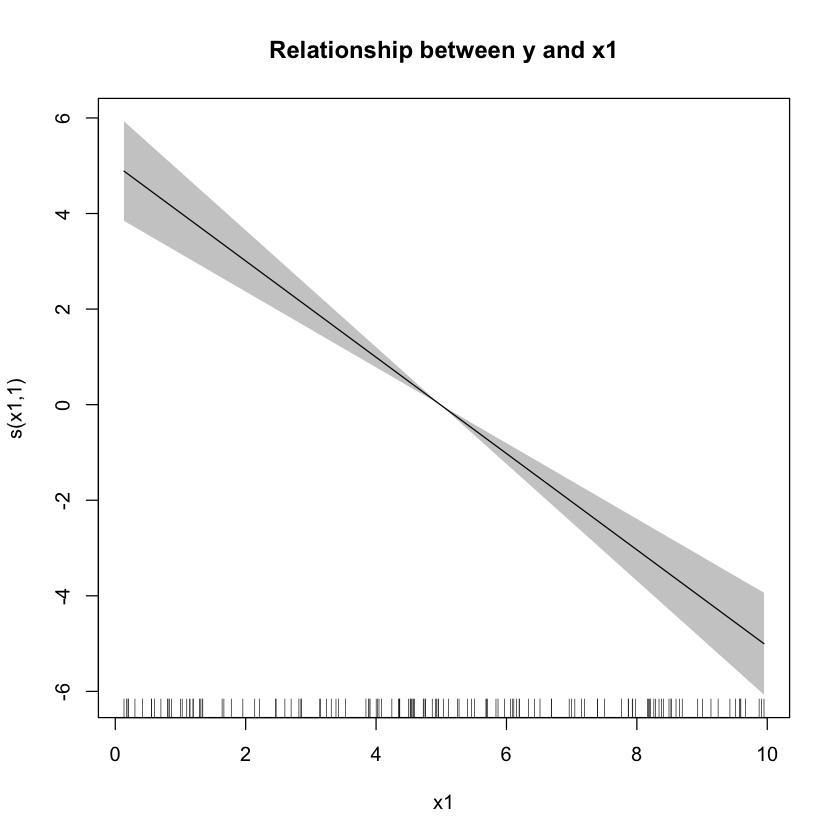

In [10]:
# # Plot the relationship between y and x1 in the GAM model
# plot.gam(gam_model, select = 1, shade = TRUE)

# Plotting the relationship between y and x1
plot(gam_model, select = 1, shade = TRUE, main = "Relationship between y and x1")


### 1.(e) Model comparison

Compute the mean squared prediction error (MSPE) for each of the three models above (regression model, GLM, and GAM). State which model performs based according to this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [11]:
# #mspe for lm


# #mspe for glm


# # mspe for gam


# # Predict using the linear regression model
# lm_pred <- predict(lm_model, newdata = test_sim)
# lm_pred
# # Compute the MSPE for the linear regression model
# lm_mspe <- mean((test_sim$y - lm_pred)^2)
# lm_mspe
# # Predict using the GLM
# glm_pred <- predict(glm_model, newdata = test_sim, type = "response")
# glm_pred
# # Compute the MSPE for the GLM
# glm_mspe <- mean((test_sim$y - glm_pred)^2)
# glm_mspe
# # Predict using the GAM model
# gam_pred <- predict(gam_model, newdata = test_sim, type = "response")
# gam_pred
# # Compute the MSPE for the GAM model
# gam_mspe <- mean((test_sim$y - gam_pred)^2)
# gam_mspe


# Predict using the linear regression model on the test set
linear_pred <- predict(linear_model, newdata = test_sim)

# Predict using the GLM model on the test set
glm_pred <- predict(glm_model, newdata = test_sim, type = "response")

# Predict using the GAM model on the test set
gam_pred <- predict(gam_model, newdata = test_sim, type = "response")

# Compute MSPE for each model
mspe_linear <- mean((test_sim$y - linear_pred)^2)
mspe_glm <- mean((test_sim$y - glm_pred)^2)
mspe_gam <- mean((test_sim$y - gam_pred)^2)

# Print MSPE for each model
cat("MSPE for Linear Regression:", mspe_linear, "\n")
cat("MSPE for GLM:", mspe_glm, "\n")
cat("MSPE for GAM:", mspe_gam, "\n")


MSPE for Linear Regression: 2.529467 
MSPE for GLM: 0.9086686 
MSPE for GAM: 0.9086681 


# Problem 2 Additive models with the advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


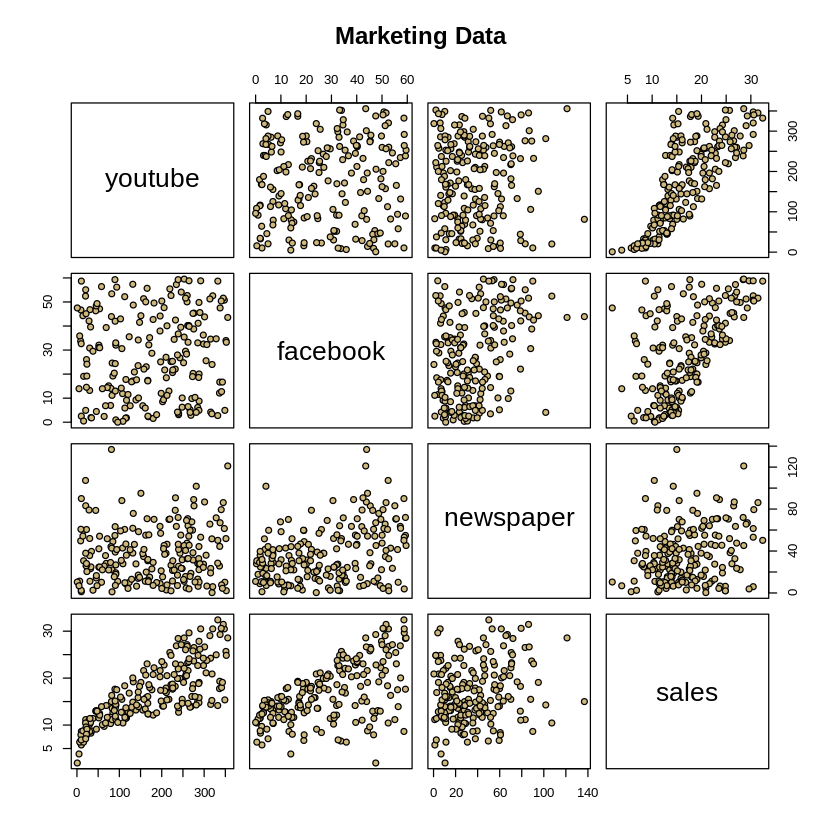

In [8]:
# Load in the data
marketing = read.csv("marketing.txt", sep = "")
head(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [9]:
set.seed(177) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**2.(a) Let's try a GAM on the marketing data!**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. In the last module, we focused on modeling the relationship between `sales` and `youtube`, omitting the other variables. Now it's time to include the additional predictors.

Using the `train_marketing` fit an additive model to the data and store it in `gam_marketing`. Produce the relevant added variable plots using `plot(gam_marketing)`. Comment on the fit of the model.

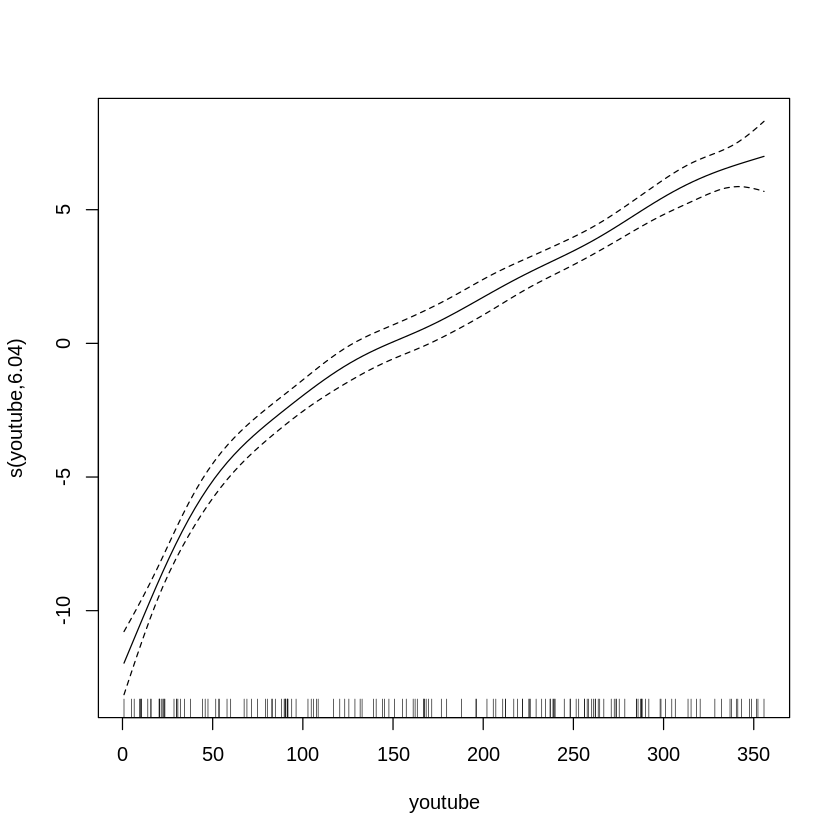

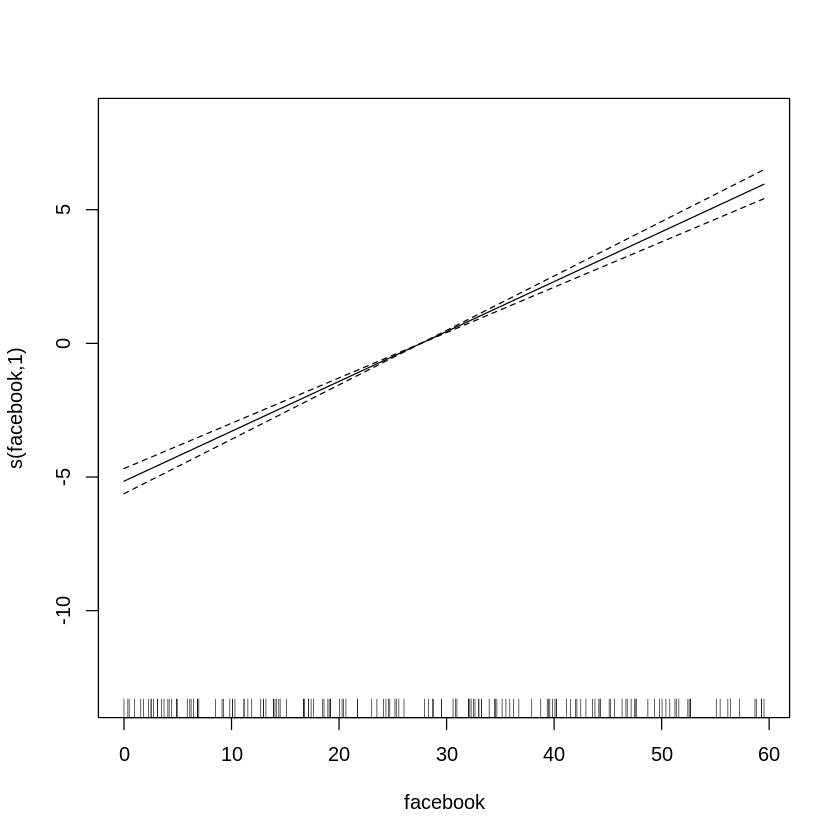

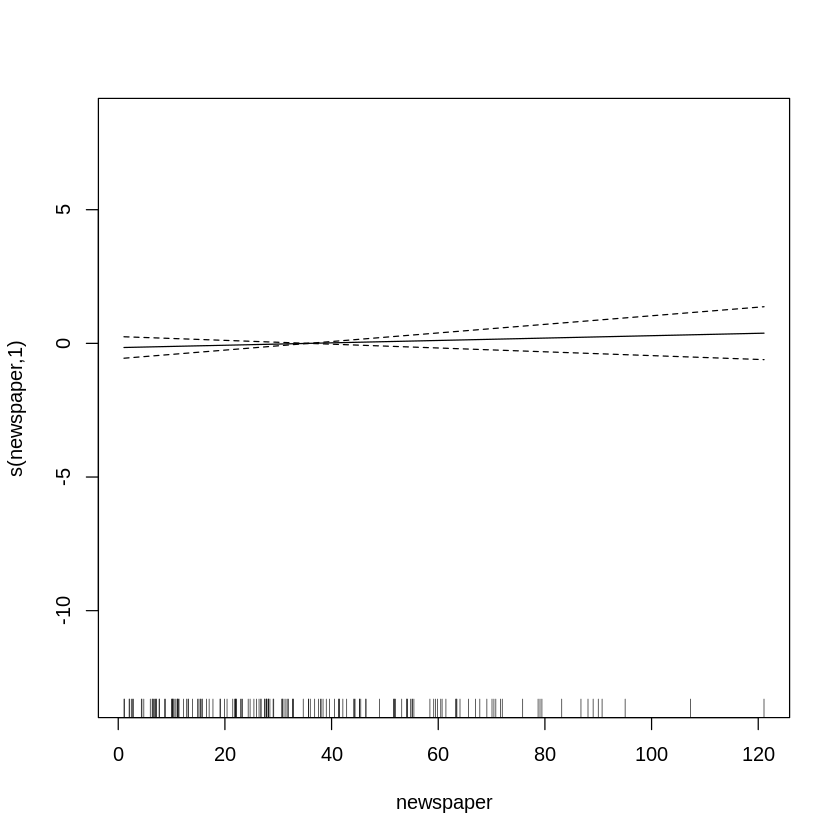

In [10]:
# Fit an additive model to the data
gam_marketing <- gam(sales ~ s(youtube) + s(facebook) + s(newspaper), data = train_marketing)

# Produce the relevant added variable plots
plot(gam_marketing)




**2.(b) Semiparametric modeling of the marketing data**

Refit the additive model based on your results from 2.(a). That is, if any predictors above should enter linearly, refit the model to reflect that. If any predictors are statistically insignificant, remove them from the model. Store your final model in `semiparametric_marketing`.

In [11]:
# Refit the additive model
semiparametric_marketing <- gam(sales ~ s(youtube) + facebook + s(newspaper), data = train_marketing)
semiparametric_marketing



Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook + s(newspaper)

Estimated degrees of freedom:
5.99 1.00  total = 8.99 

GCV score: 2.959993     

**2.(c) Model comparisons**

Now, let's do some model comparisons on the test data. Compute the mean squared prediction error (MSPE) on the `test_marketing` data for the following three models:

- `gam_marketing` from 2.(a)


- `semiparametric_marketing`from 2.(b)


- `lm_marketing`, a linear regression model with `sales` is the response and `youtube` and `facebook` are predictors (fit on the `train_marketing` data).

State which model performs based according to this metric.

In [12]:
#mspe for gam


#mspe for semiparametric


# mspe for lm

# MSPE for gam_marketing
test_marketing$predicted_gam <- predict(gam_marketing, newdata = test_marketing)
mspe_gam <- mean((test_marketing$sales - test_marketing$predicted_gam)^2)
mspe_gam
# MSPE for semiparametric_marketing
test_marketing$predicted_semiparametric <- predict(semiparametric_marketing, newdata = test_marketing)
mspe_semiparametric <- mean((test_marketing$sales - test_marketing$predicted_semiparametric)^2)
mspe_semiparametric
# Create lm model
lm_model_marketing <- lm(sales ~ youtube + facebook, data = train_marketing)
lm_model_marketing
# MSPE for lm_model_marketing
test_marketing$predicted_lm <- predict(lm_model_marketing, newdata = test_marketing)
mspe_lm <- mean((test_marketing$sales - test_marketing$predicted_lm)^2)
mspe_lm

[1] 3.438202

[1] 3.455055


Call:
lm(formula = sales ~ youtube + facebook, data = train_marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.61705      0.04643      0.17793  


[1] 4.197701